#### Student Name: Vivian
#### Student ID: A17442498


## Spectrograms, STFT and Griffin-Lim Phase Reconstruction

Instructions: 

This notebook is an interactive assignment; please read and follow the instructions in each cell.

Assignments are to be completed individually.

Cells that require your input (in the form of code or written response) will have 'Question #' above.

After completing the assignment, please submit this notebook.

# Seeing Sound Using Spectrograms

For this portion of the assignment, you will have the chance to see your own voice!
First, make two recordings of yourself:

In the first recording, you will say a vowel sound of your choice ("ah", "ee", "oo", etc.). Try to keep the sound short (no longer than you would make the vowel sound in a typical word ("car", "see", "good"). 

In the second recording, sing (or play on an instrument) any major scale, at a tempo of 60 bpm. (Don't worry, it doesn't need to be perfect- your best effort will be great!). 

Make sure both of your recordings are saved as mono WAV files. Audacity is a great tool to quickly convert audio file formats (and convert from stereo to mono). 

In [1]:
from music21 import midi as midi21
from music21 import stream
import copy
import music21
import soundfile as sf
from __future__ import  division
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy
from scipy import signal
import librosa
%matplotlib inline
import IPython.display as ipydisplay
from IPython.display import Audio, display

def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

##### Question 1 [5 points]

In [5]:
### Modify the line below with your WAV file:

sample_rate, input_signal = wavfile.read("Assignment1/Vowel.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)

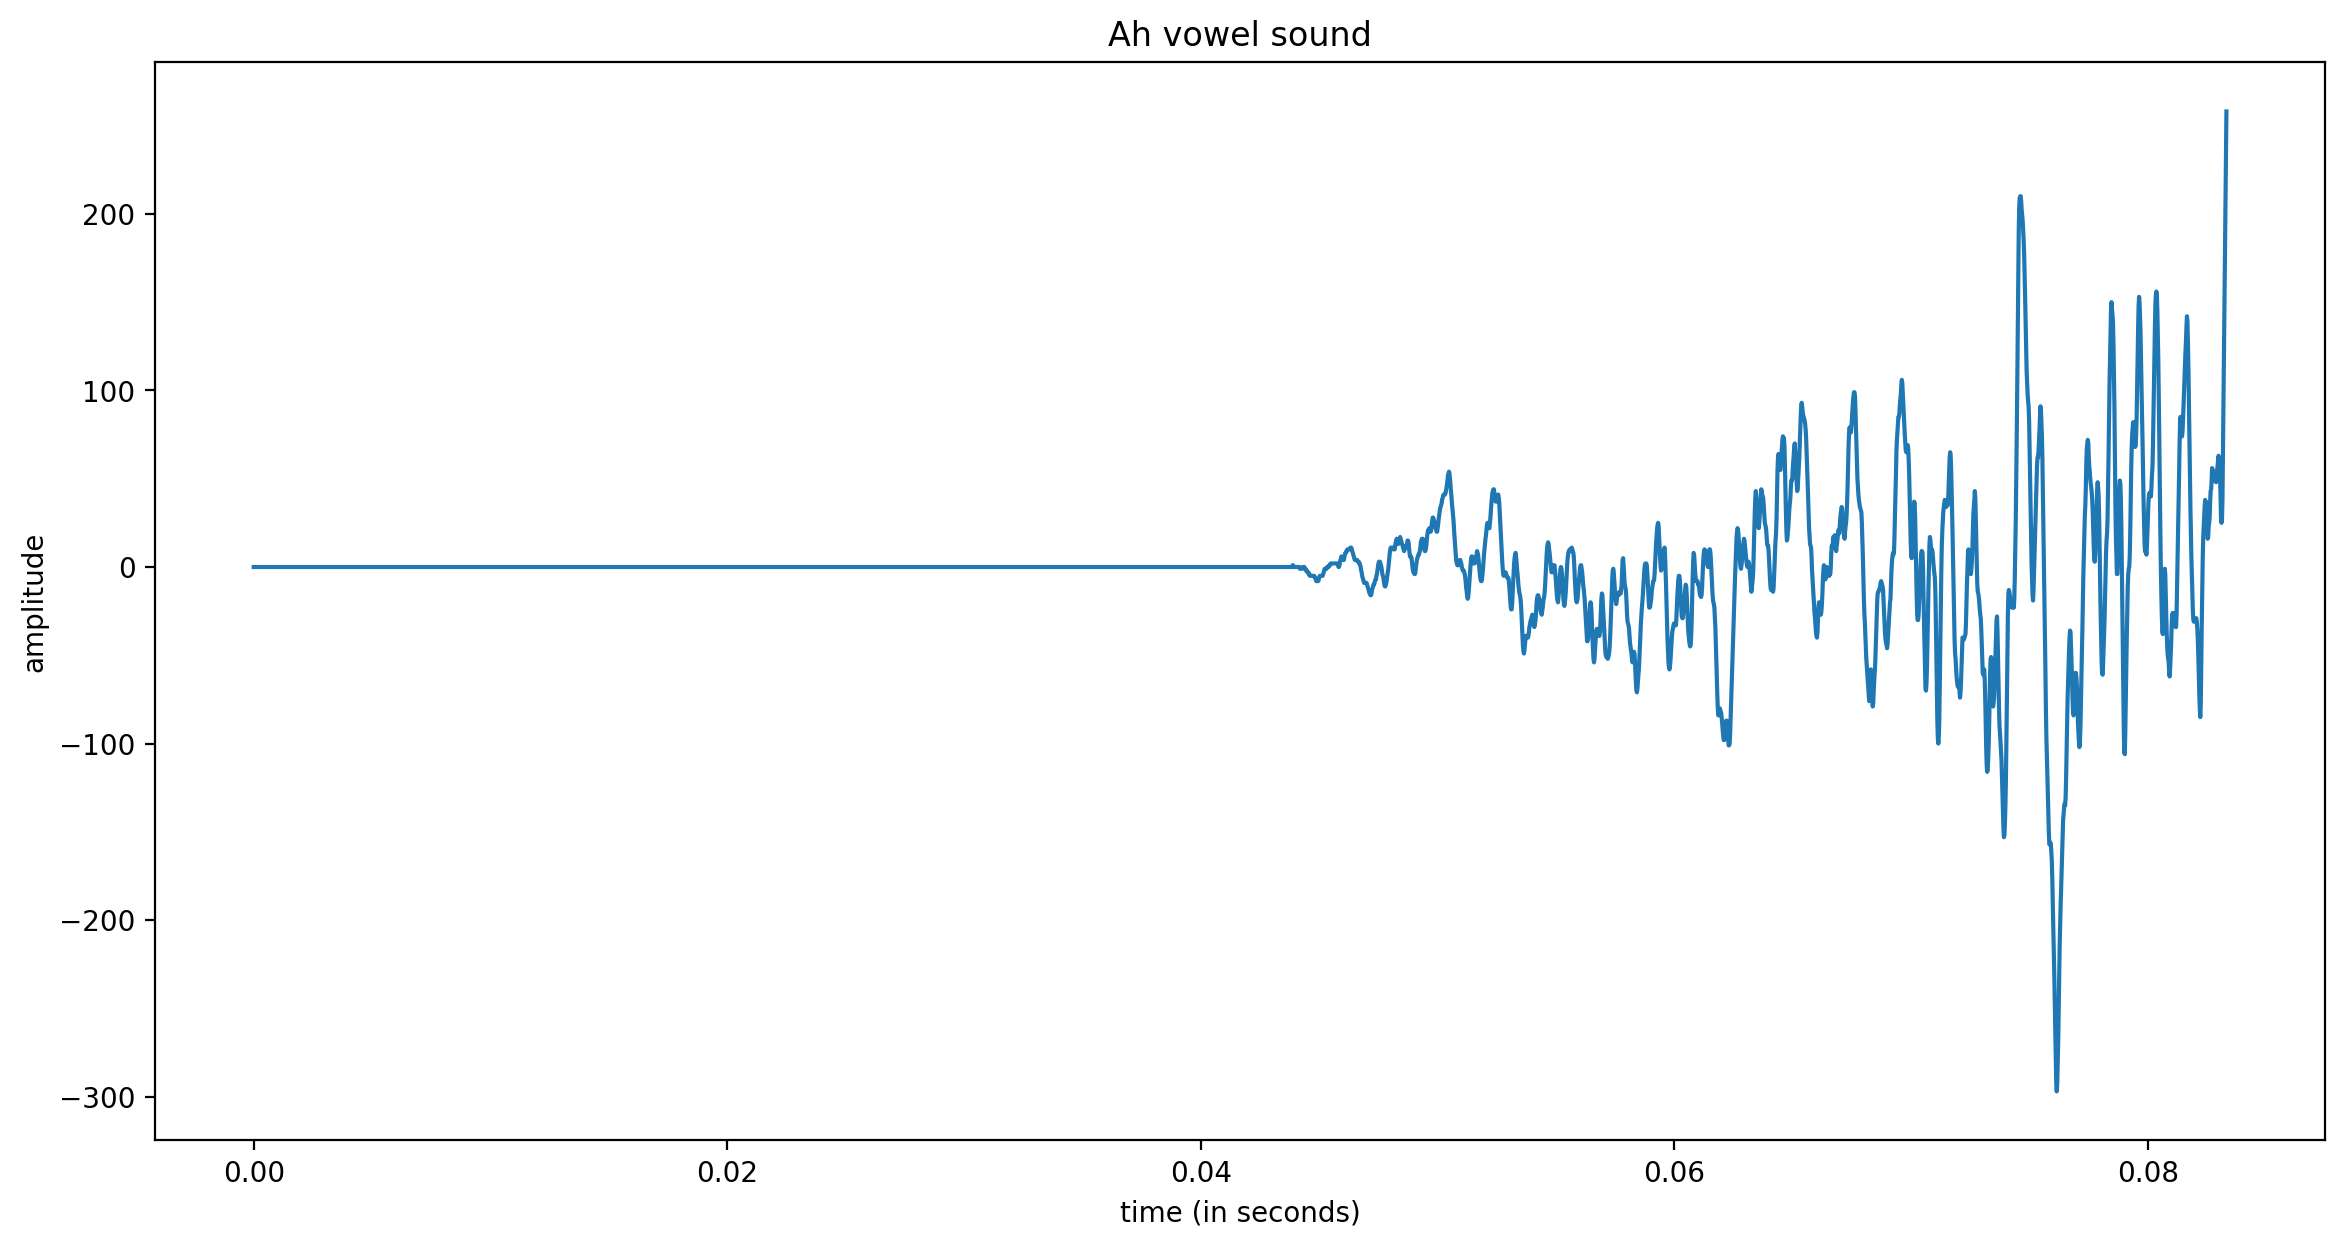

In [6]:
setup_graph(title='Ah vowel sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:4000], input_signal[0:4000])

##### Question 2 [10 points]

The FFT of your input signal is complex valued (real and imaginary components). 
To visualize the output of the FFT of your input signal, we will calculate the magnitude of the FFT output.
In your code, you may want to make use of the .real and .imag members of the numpy complex128 class as you explore the fft_out datatype. 

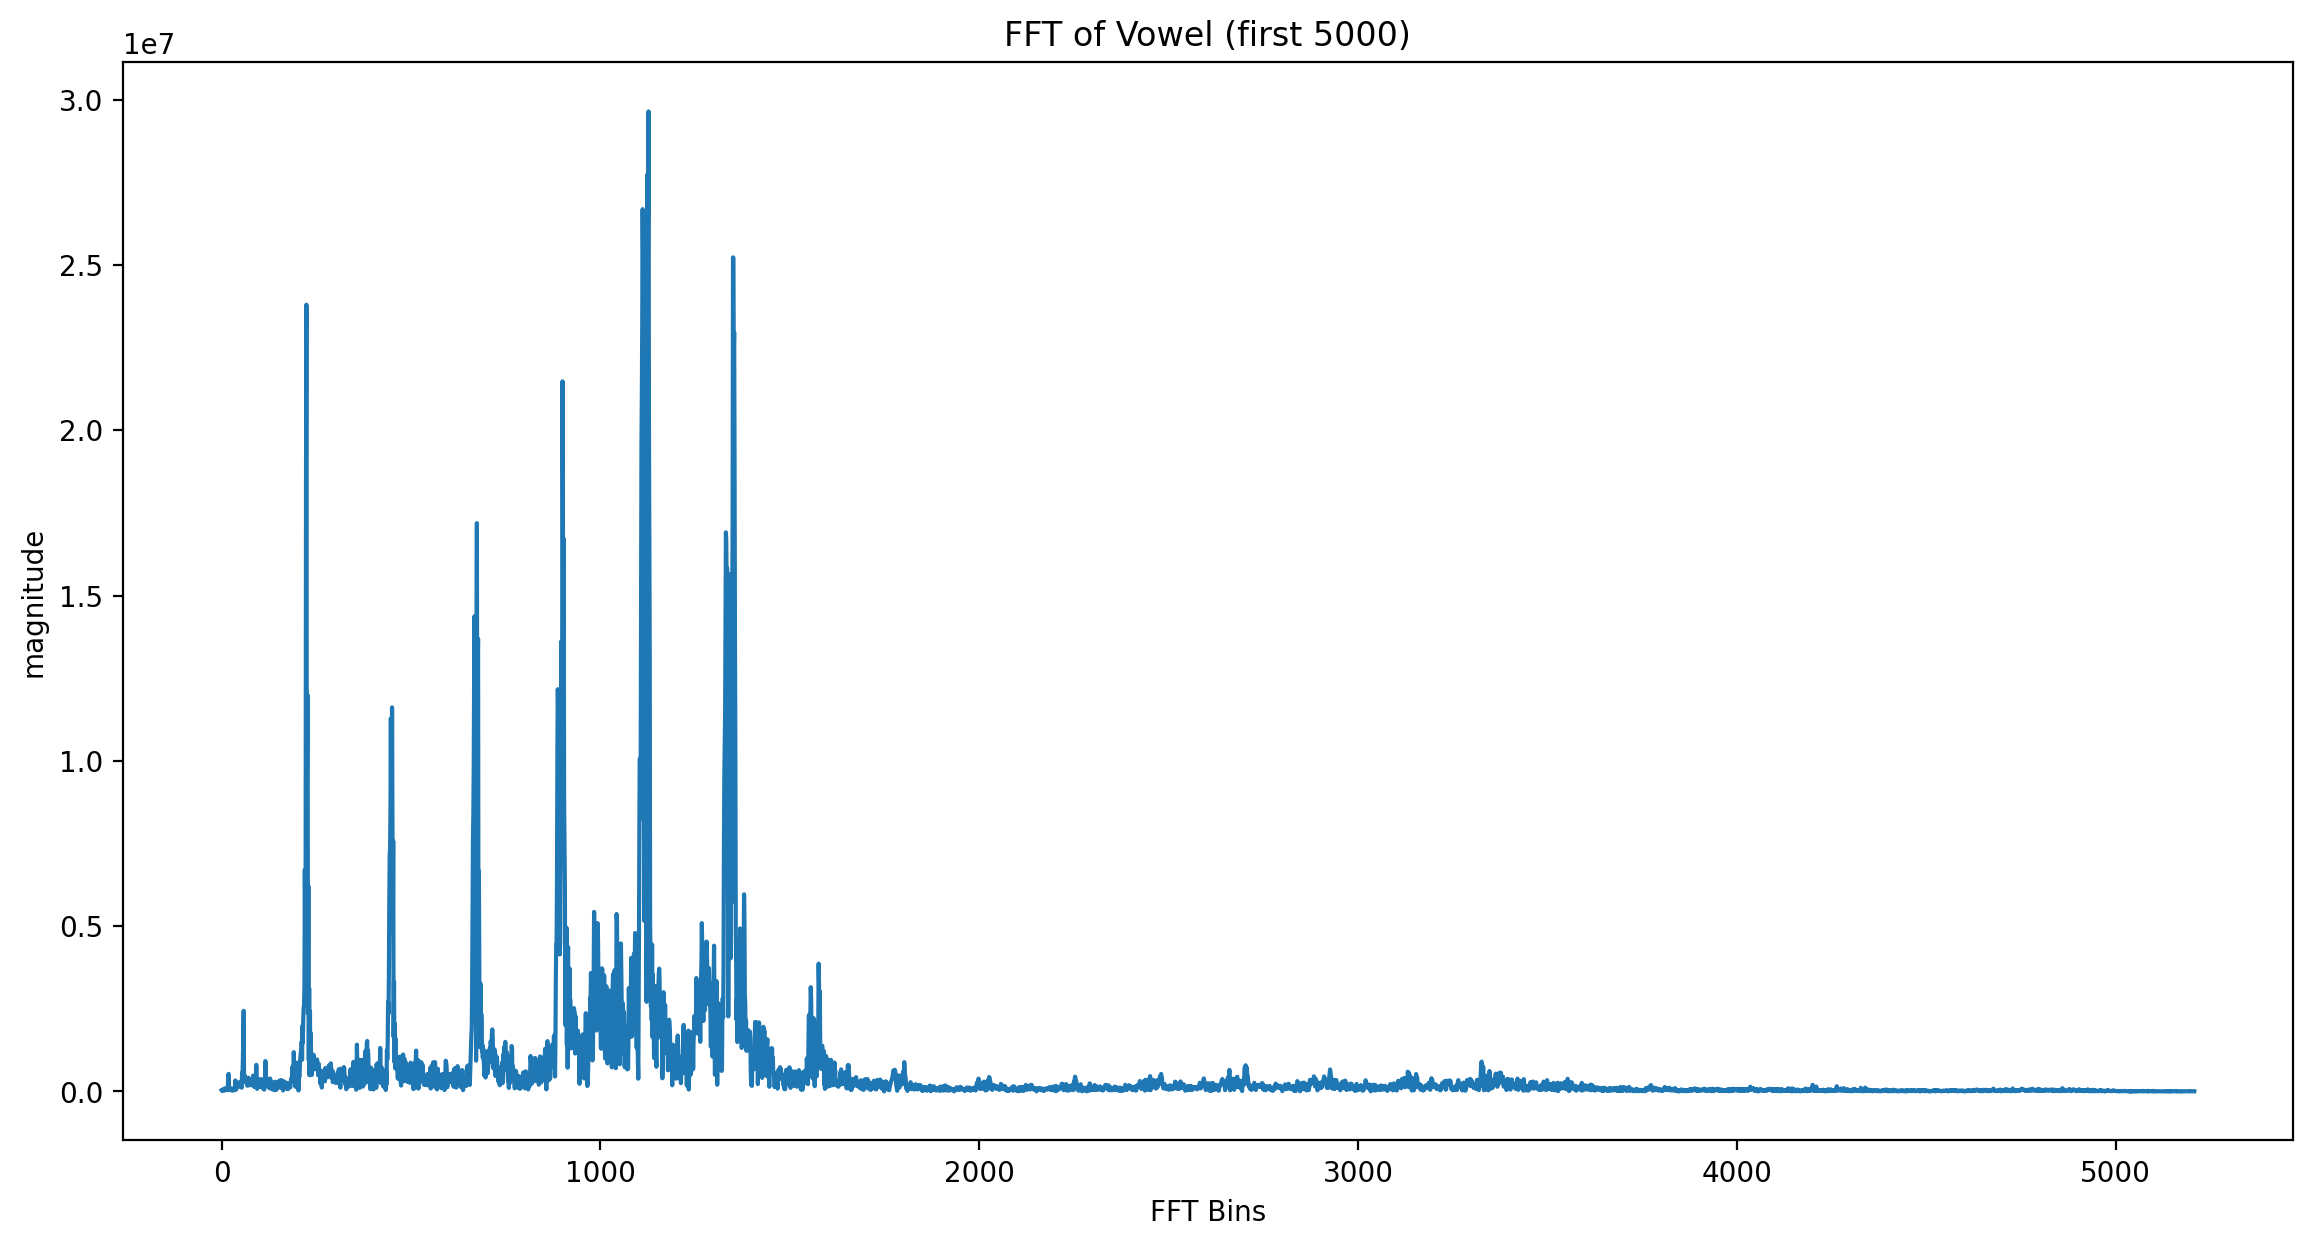

In [7]:
fft_out = np.fft.rfft(input_signal)

fft_mag = np.fft.rfft(input_signal)

fft_mag = np.abs(fft_out)

num_samples = len(input_signal)
rfreqs = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]
setup_graph(title='FFT of Vowel (first 5000)', x_label='FFT Bins', y_label='magnitude', fig_size=(14,7))
_ = plt.plot(rfreqs[0:5000], fft_mag[0:5000])

##### Question 3 [10 points]

Would you expect another person's recording of the same vowel sound (on the same pitch and at the same volume) to have a similar FFT graph? What musical term is used to describe this quality? 

``` Your response here ```
Yes, the FFT graph would be similar because the location of formant peaks, but not identical due to differences in vocal pitch. This quality is described by the musical term timbre.

# Spectrogram (FFT over time)

### Axes

* x-axis: time
* y-axis: frequency
* z-axis (color): strength of each frequency

### See the Harmonics!

##### Question 4 [5 points]

c:\Users\vivia\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\axes\_axes.py:8264: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


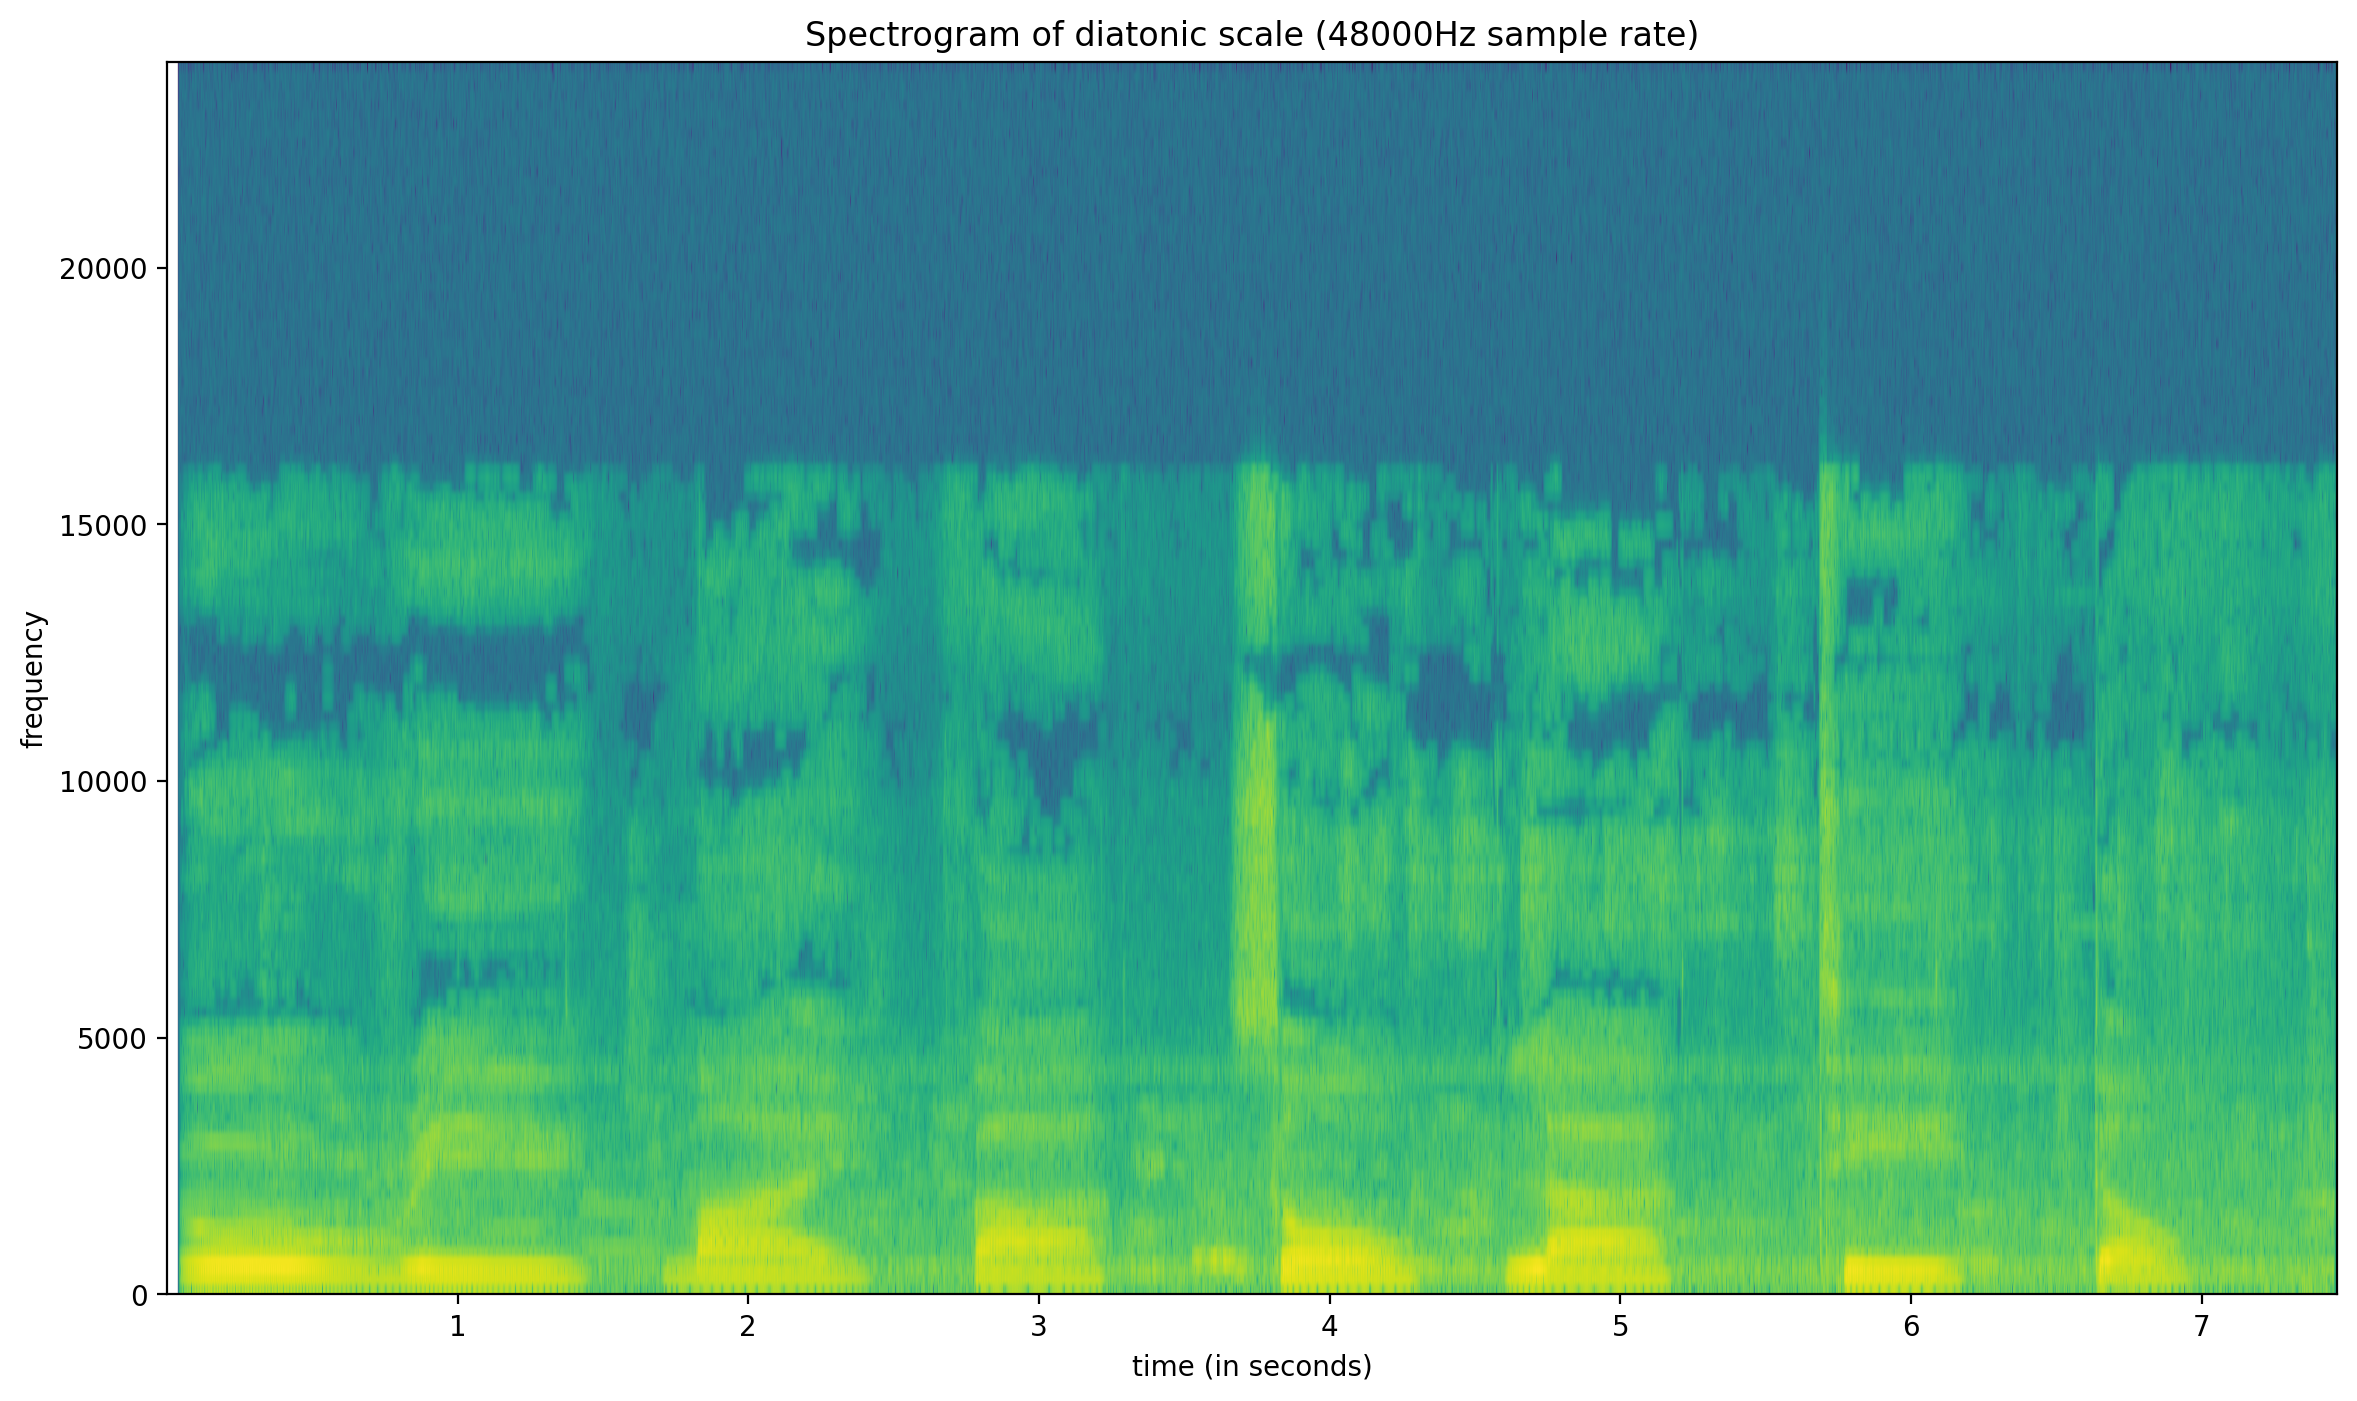

In [9]:
### Modify the line below:
sample_rate, sample = wavfile.read("Assignment1/Scale.wav")

setup_graph(title='Spectrogram of diatonic scale (%dHz sample rate)' % sample_rate, x_label='time (in seconds)', y_label='frequency', fig_size=(14,8))
_ = plt.specgram(sample, Fs=sample_rate)

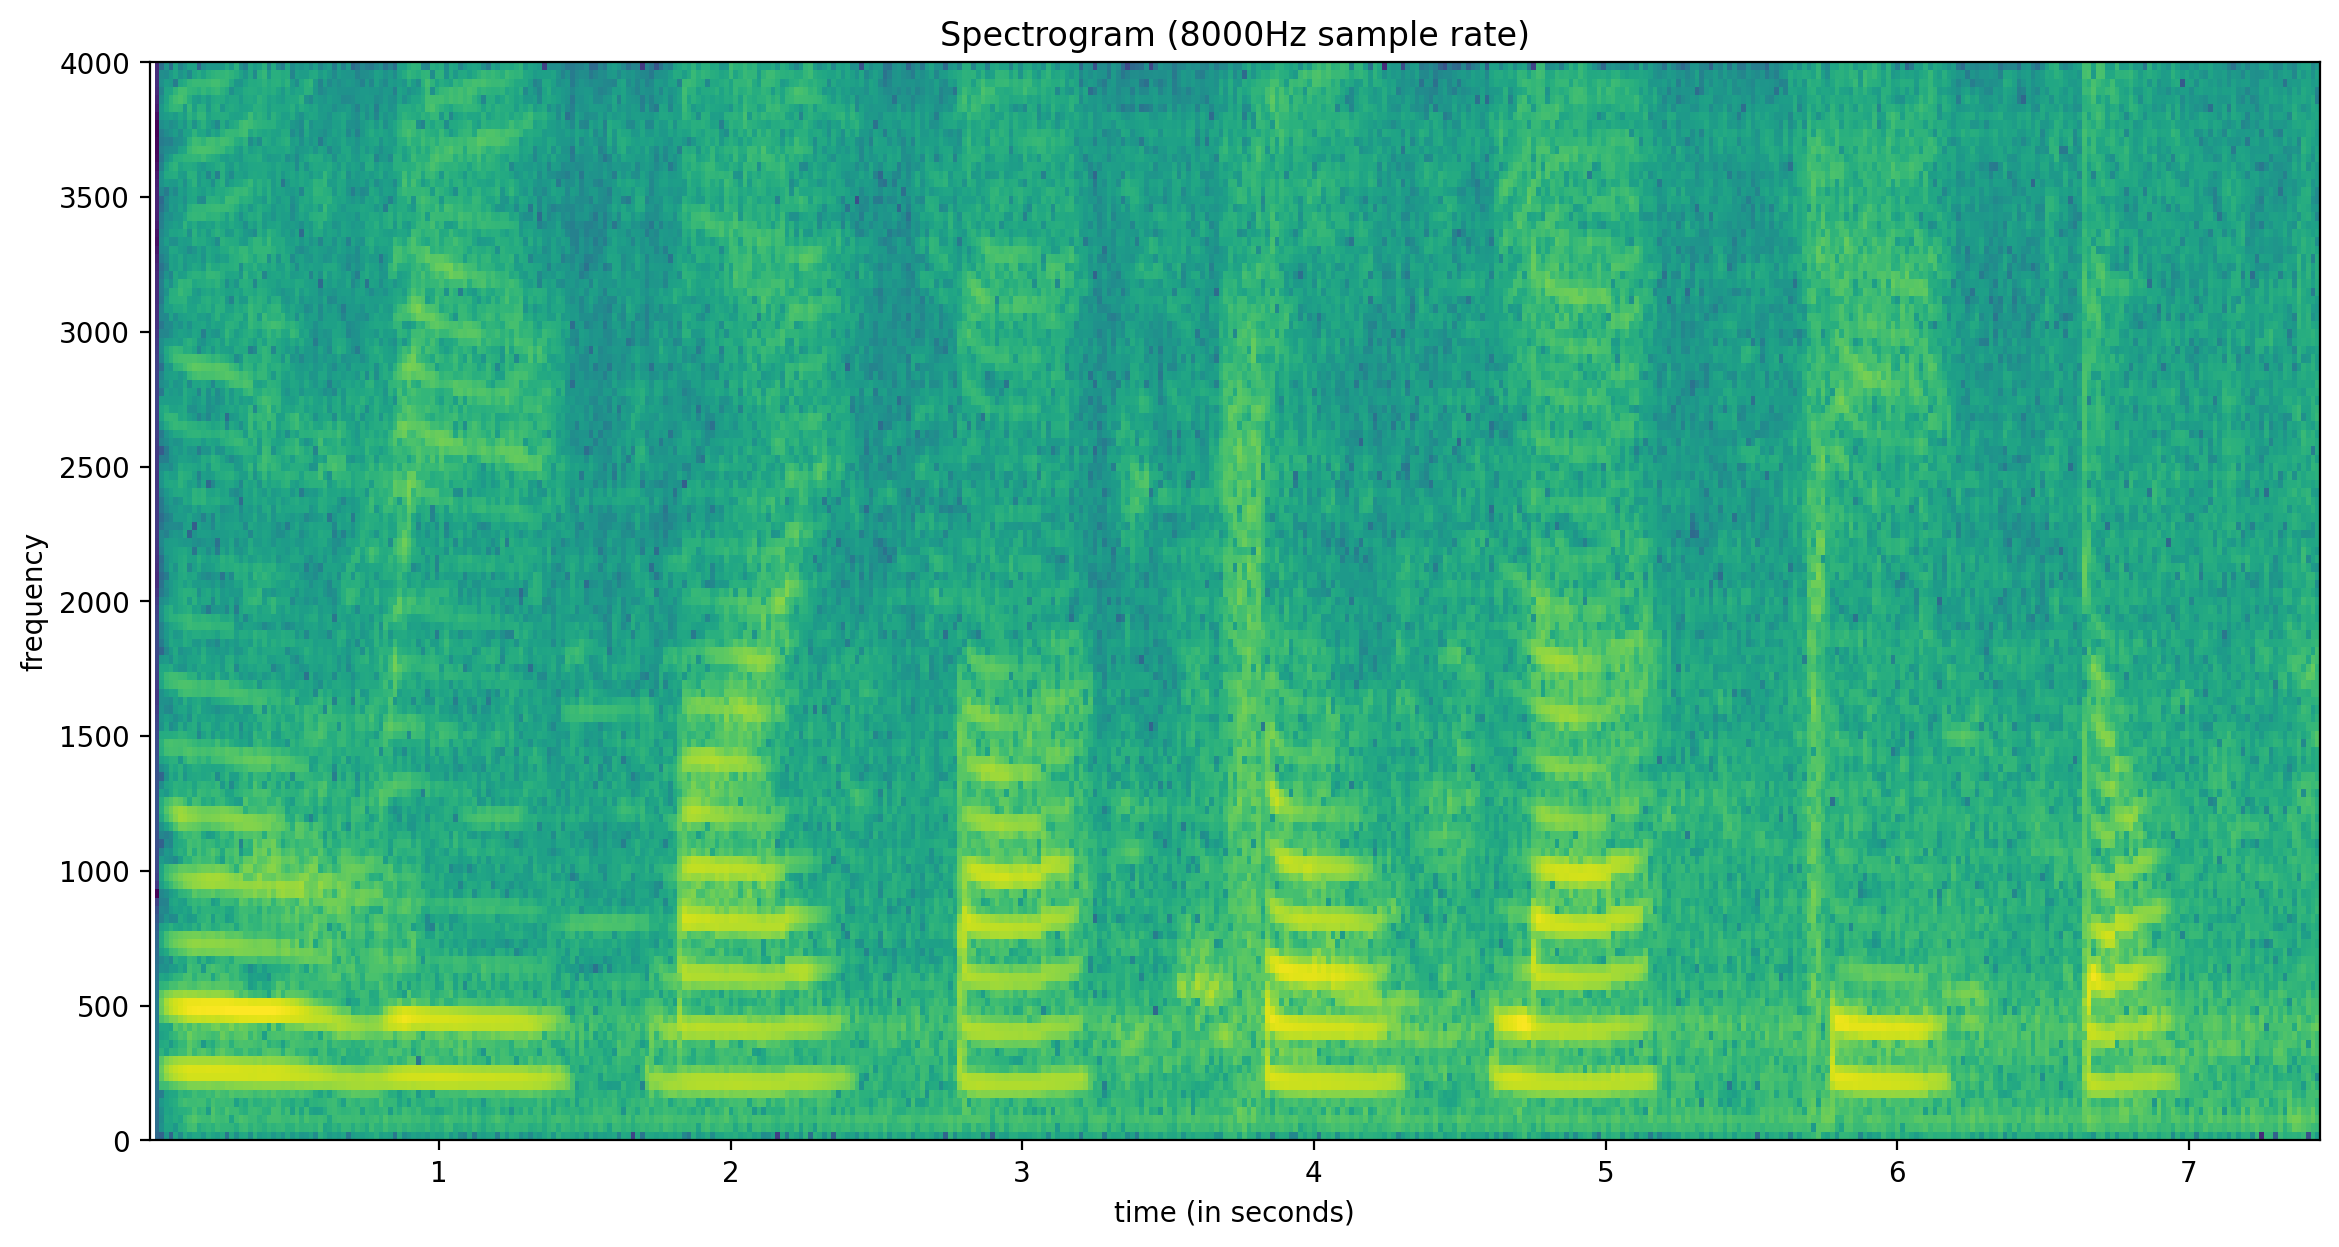

In [10]:
sample_8000hz = [sample[i] for i in range(0, len(sample), sample_rate//8000)]
setup_graph(title='Spectrogram (8000Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(sample_8000hz, Fs=8000)

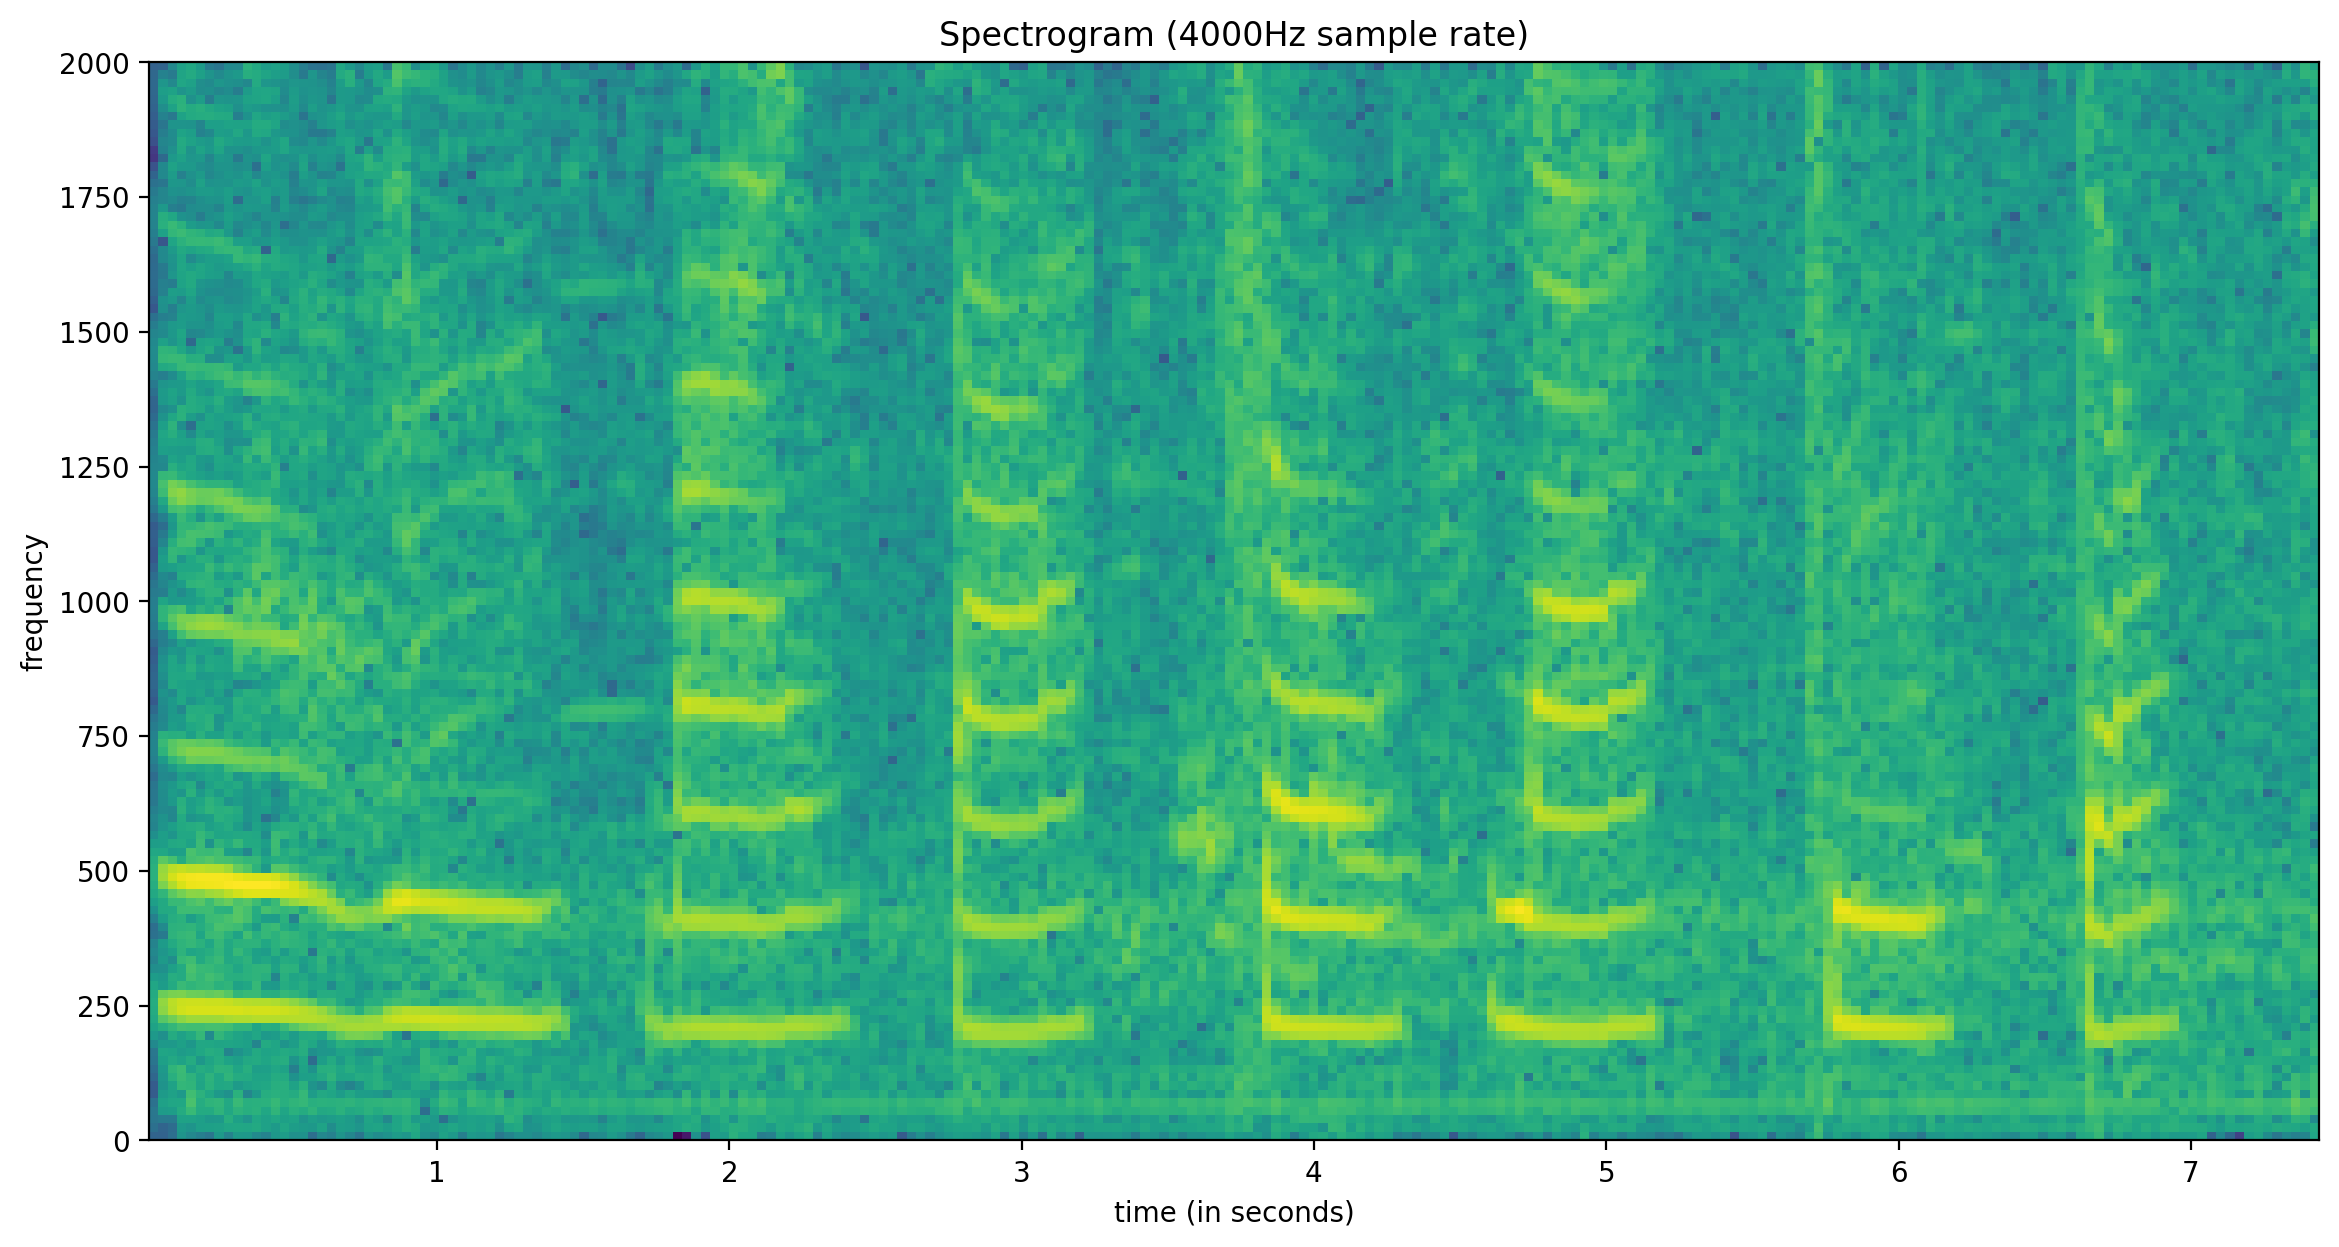

In [11]:
sample_4000hz = [sample[i] for i in range(0, len(sample), sample_rate//4000)]
setup_graph(title='Spectrogram (4000Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(sample_4000hz, Fs=4000)

In your recording, you were singing (or playing) a single note at a time. Does this still appear to be the case when looking at the spectrogram of your recording? What are you observing? 

What would you expect the relationship between the first and last note on your spectrogram to be? Is this the case?  

``` Your response here ``` When analyzing the spectrogram of my recorded WAV file, is a clear separation between notes over time. The spectrogram shows one dominant frequency band per note, which is expected for single-note performance. However, I also observed additional fainter lines above the main frequency bands the harmony occur and give each note its unique timbre. The relationship between the first and last notes is consistent with the structure of a major scale: the final note appears approximately one octave higher than the first, meaning its fundamental frequency is about twice as high. This confirms that the pitch progression and interval spacing of the recorded scale are accurate and match musical expectations.

##### Question 5 [10 points]

Note that the way naive resampling method is done above is theoretically incorrect. Can you explain why? Read about the resampling method in other signal processing libraries such as librosa. 

``` Your response here ``` The naive resampling method is theoretically incorrect because it does not apply proper filtering to prevent aliasing. When we simply drop or duplicate samples without filtering, we violate the Nyquist-Shannon sampling theorem, which states that we must remove frequencies above half the new sampling rate before resampling. Libraries like librosa or scipy.signal.resample handle this correctly by applying anti-aliasing filters during the resampling process, ensuring the frequency content remains accurate and no unwanted distortion is introduced. Therefore, using these libraries produces more faithful and reliable results when changing the sampling rate of an audio signal.

##### Question 6 [20 points]

Do another 1000 Hz resampling twice: once using the naive method above and second time using a proper downsampling. Plot both spectrograms. Can you detect a difference? 


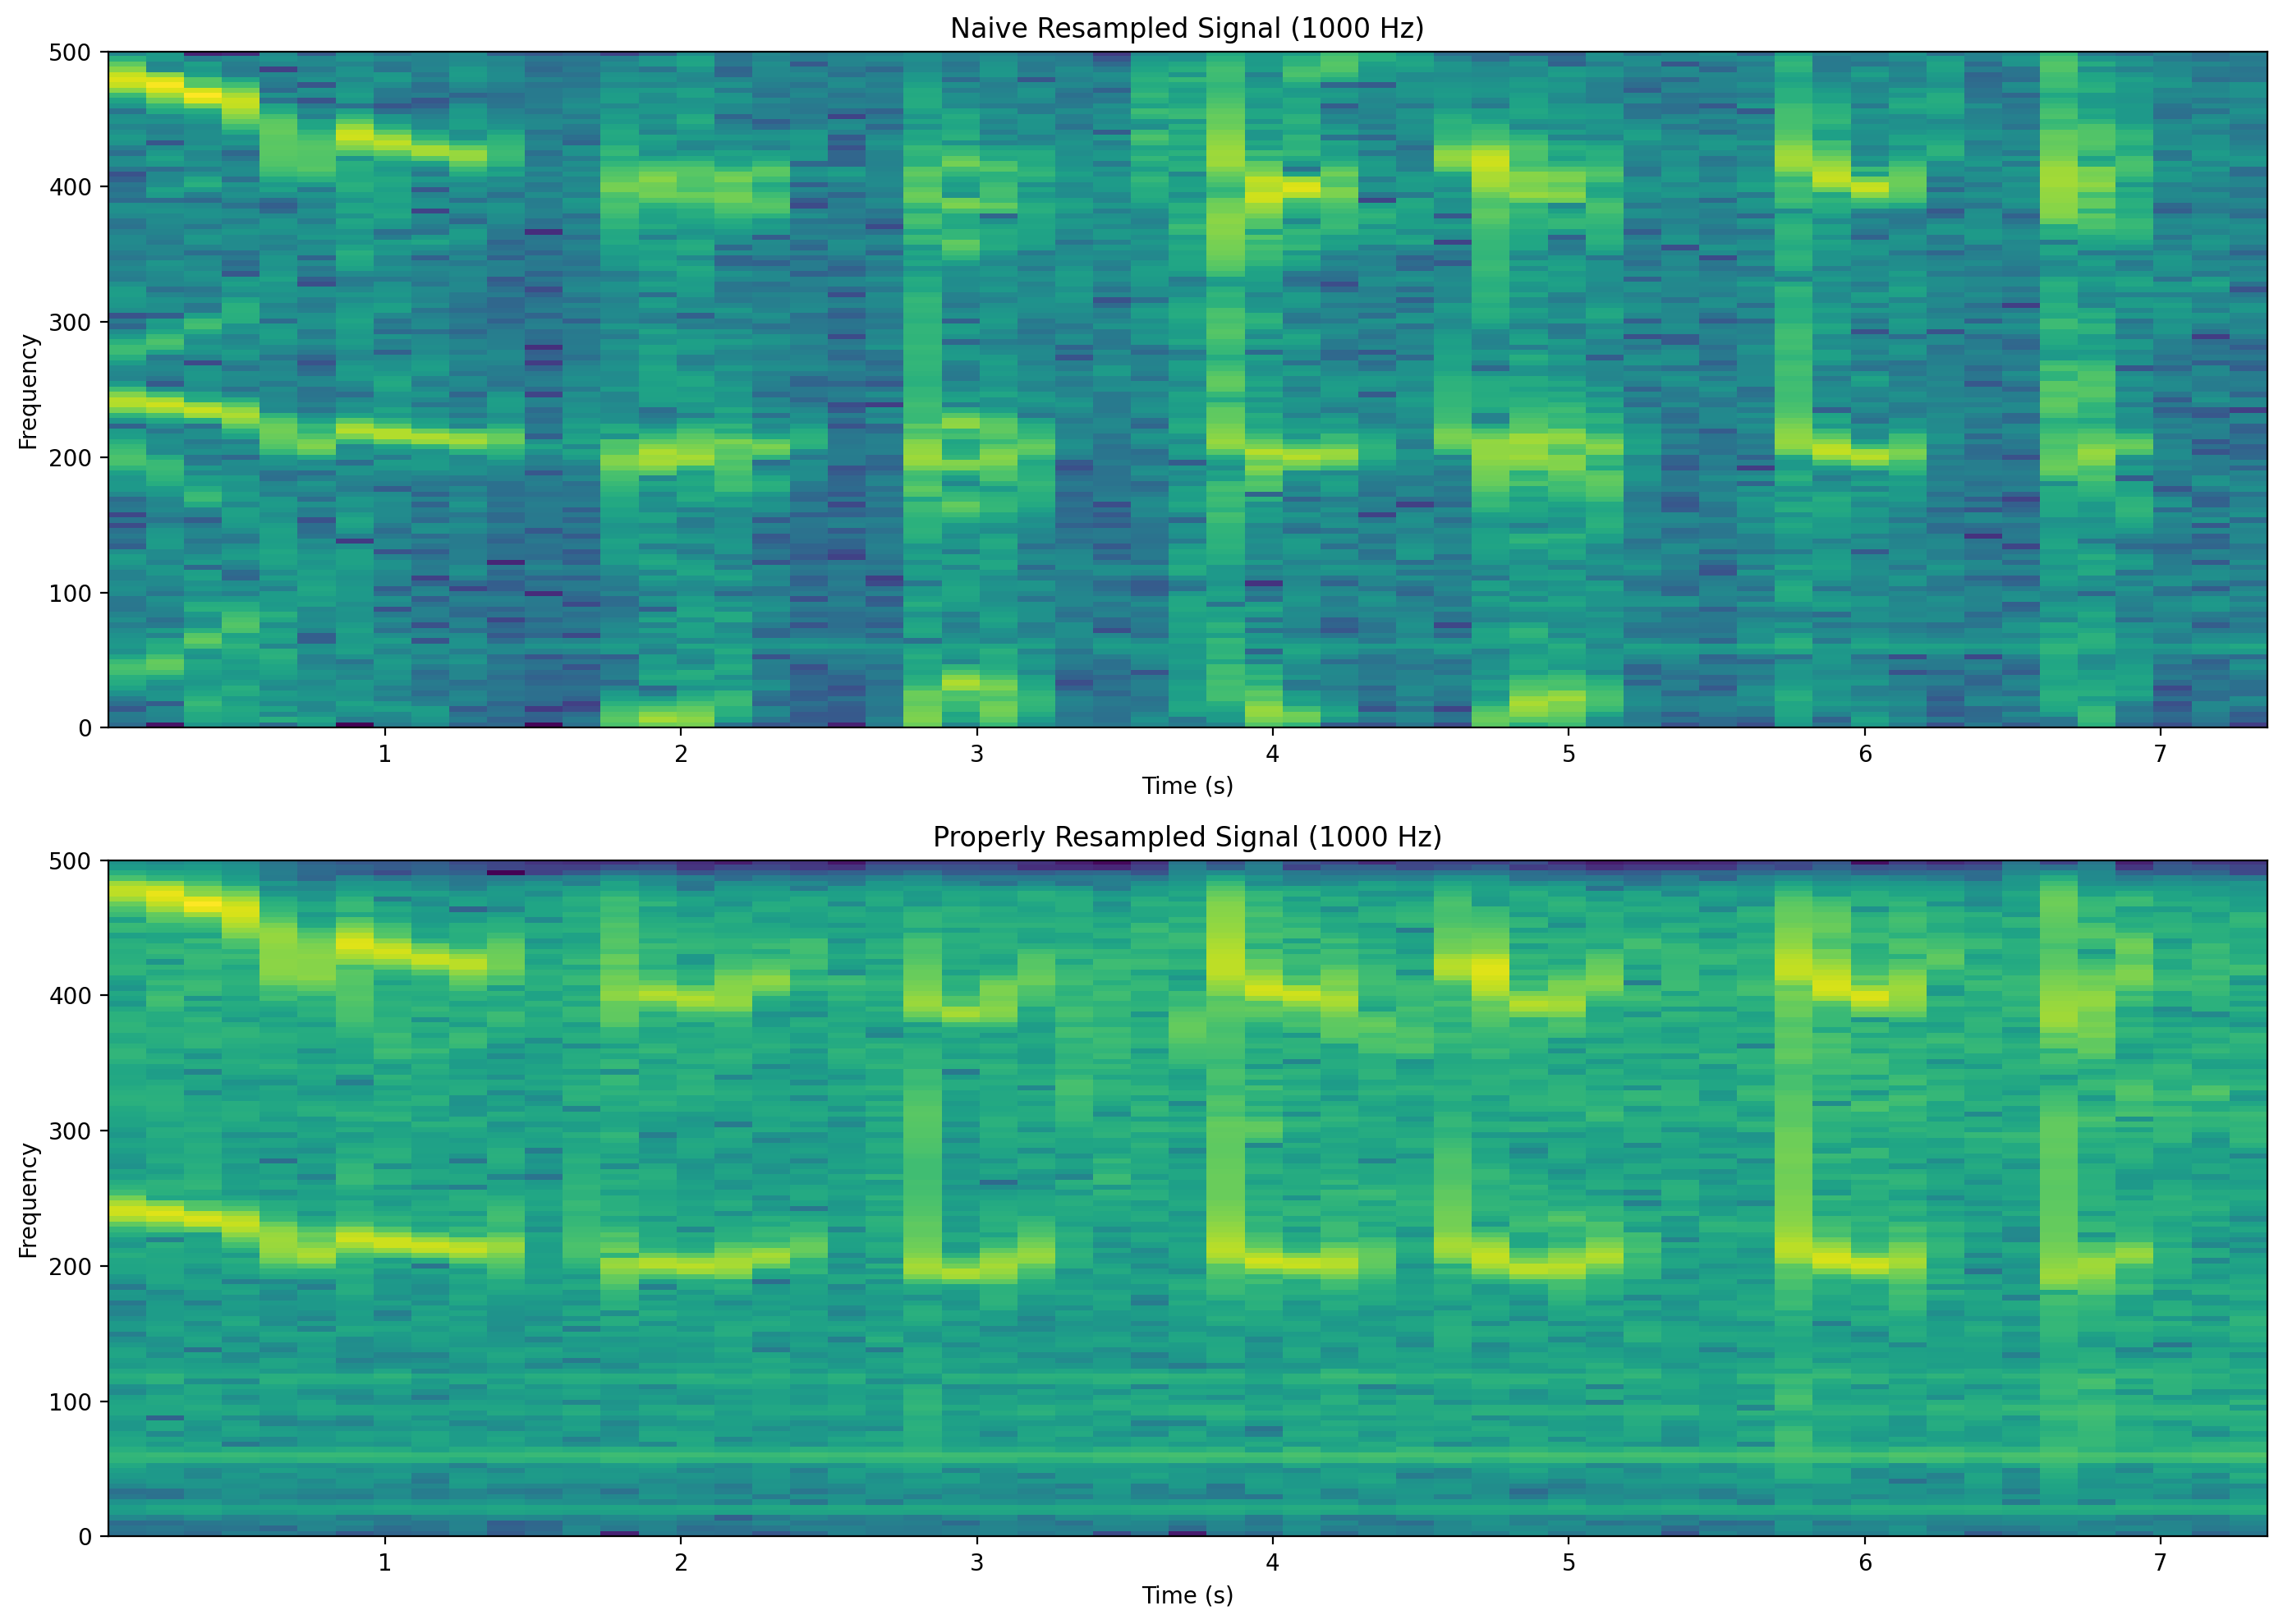

In [16]:

target_rate = 1000
factor = sample_rate // target_rate
naive_resampled = sample[::factor]


sample_float = sample.astype(float)  
proper_resampled = librosa.resample(sample_float, orig_sr=sample_rate, target_sr=1000)
plt.figure(figsize=(14, 10))

# Naive Resample Spectrogram
plt.subplot(2, 1, 1)
plt.title("Naive Resampled Signal (1000 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.specgram(naive_resampled, Fs=1000)

# Proper Resample Spectrogram
plt.subplot(2, 1, 2)
plt.title("Properly Resampled Signal (1000 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.specgram(proper_resampled, Fs=1000)

plt.tight_layout()
plt.show()




``` Your response here ``` Yes, there is a differences. The properly resampled signal retains much better frequency detail and avoids the aliasing and distortion introduced by the naive method. This demonstrates why proper downsampling is necessary when reducing sample rate in signal processing tasks.

# Spectrogram inversion from spectral amplitude

Short-time Fourier Transform (STFT) analysis takes short snapshots of sound and represents them as a matrix of fft vectors.
As we saw above, the fft is a complex transform that contain information about amplitude and phase of each frequency component. In many applications we choose to discard the phases and use the amplitudes only. 

One challenge is to reconstruct the original waveform from amplitude information only.

For these questions, we will explore an iterative method by Griffin and Lim.

Let's start with creating spectral amplitudes of your earlier vowel WAV file:

##### Question 7 [5 points]

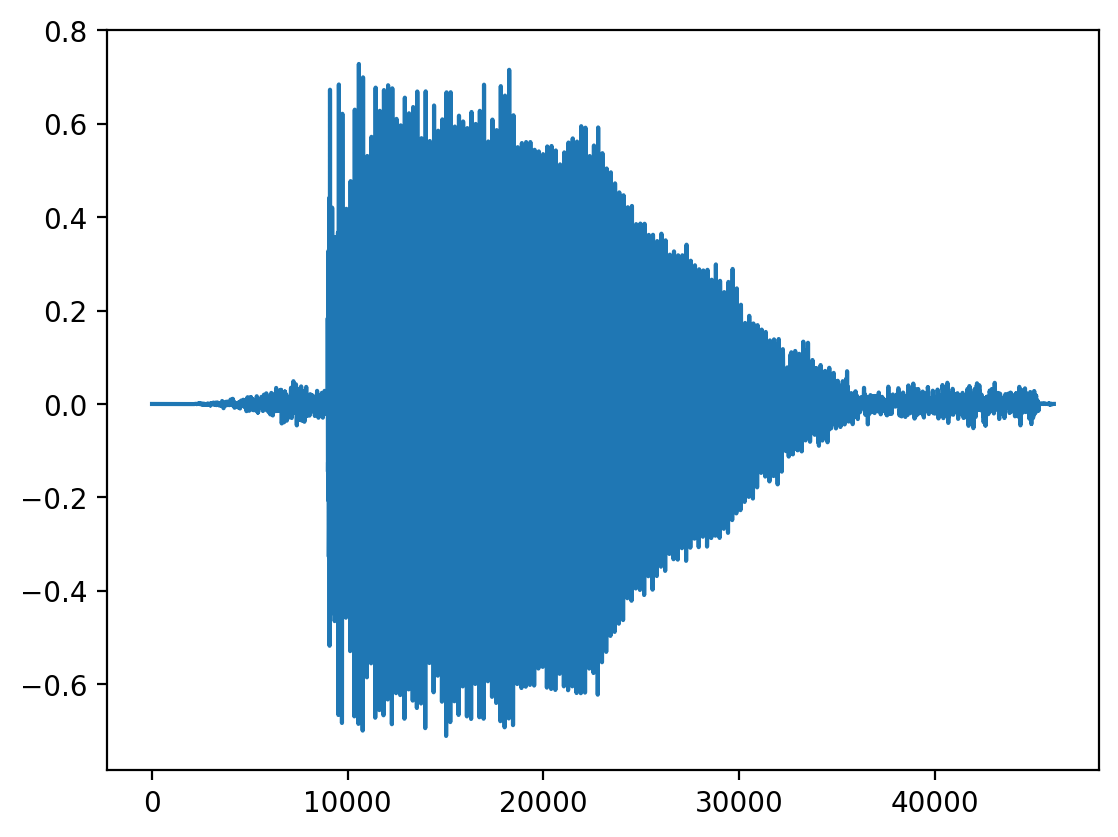

In [20]:
# Reads wav file and produces spectrum
# Fourier phases are ignored

def wave_to_spectum(x, n_fft):
    S = librosa.stft(x, n_fft = n_fft)
    p = np.angle(S)   
    A = np.log1p(np.abs(S))  
    return A

### Replace the string below with your file:
filename = 'Assignment1/Vowel.wav'
x, fs = librosa.load(filename, sr=None)
n_fft = 2048
plt.plot(x)
SA = wave_to_spectum(x, n_fft)

In [21]:
ipydisplay.Audio(data=x, rate=fs)

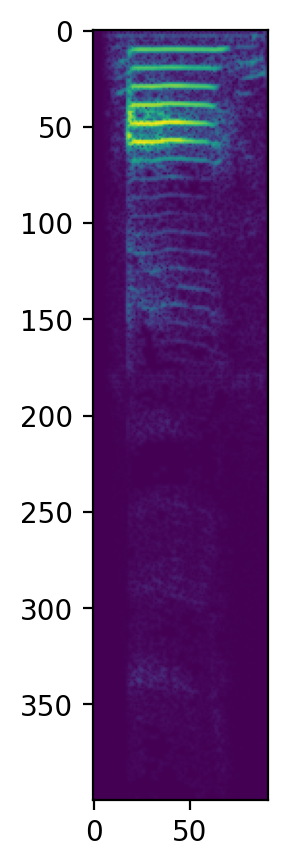

In [22]:
plt.figure(figsize=(15,5))
plt.imshow(SA[:400,:])
plt.show()

## Griffin and Lim method

In the next code block, you will implement the Griffin and Lim iterative method for phase reconstruction.
Please look over the pseudocode available on pg. 1865 of Wakabayashi & Ono's 2019 paper, available at http://www.apsipa.org/proceedings/2019/pdfs/290.pdf

The random phase initialization is provided as p. Please use 1000 iterations for your reconstruction. 

You may find the librosa functions istft and stft helpful in your implementation. 

##### Question 8 [30 points]

In [31]:
def write_spectrum_wav(a, N_FFT):
    # Given input amplitude a, return reconstructed signal x using the Griffin & Lim iterative method.
    a = np.exp(a)-1
    p = 2 * np.pi * np.random.random_sample(a.shape) - np.pi
    S = a * np.exp(1j * p)

    for i in range(1000):
        x = librosa.istft(S)
        S_new = librosa.stft(x, n_fft=N_FFT)
        S = a * np.exp(1j * np.angle(S_new)) 
    
    # Final output waveform
    x_out = librosa.istft(S)
    return x_out
    
    
x_out = write_spectrum_wav(SA, n_fft)


Now we can compare your reconstruction to the original signal, both auditorily and visually: 

In [32]:
OUTPUT_FILENAME = 'out.wav'
sf.write(OUTPUT_FILENAME, x_out, fs)
display(Audio(OUTPUT_FILENAME))

In [33]:
display(Audio(filename))

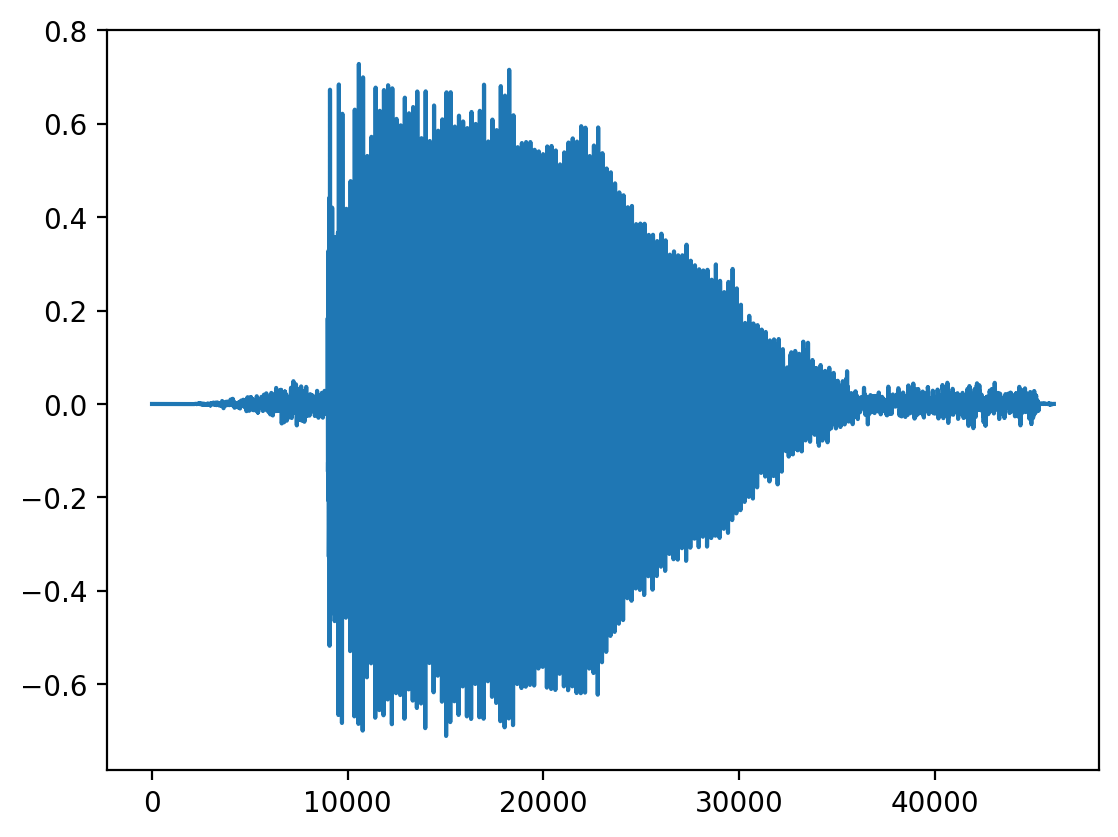

In [34]:
plt.plot(x)

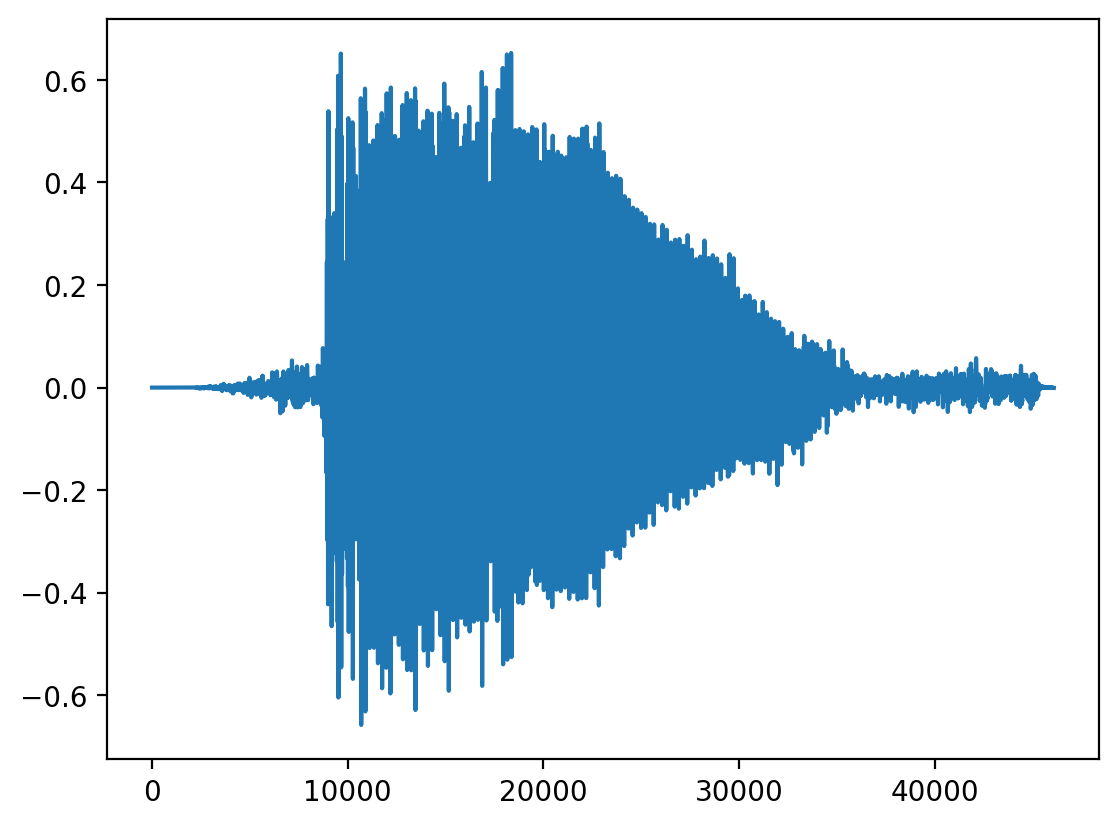

In [35]:
plt.plot(x_out)

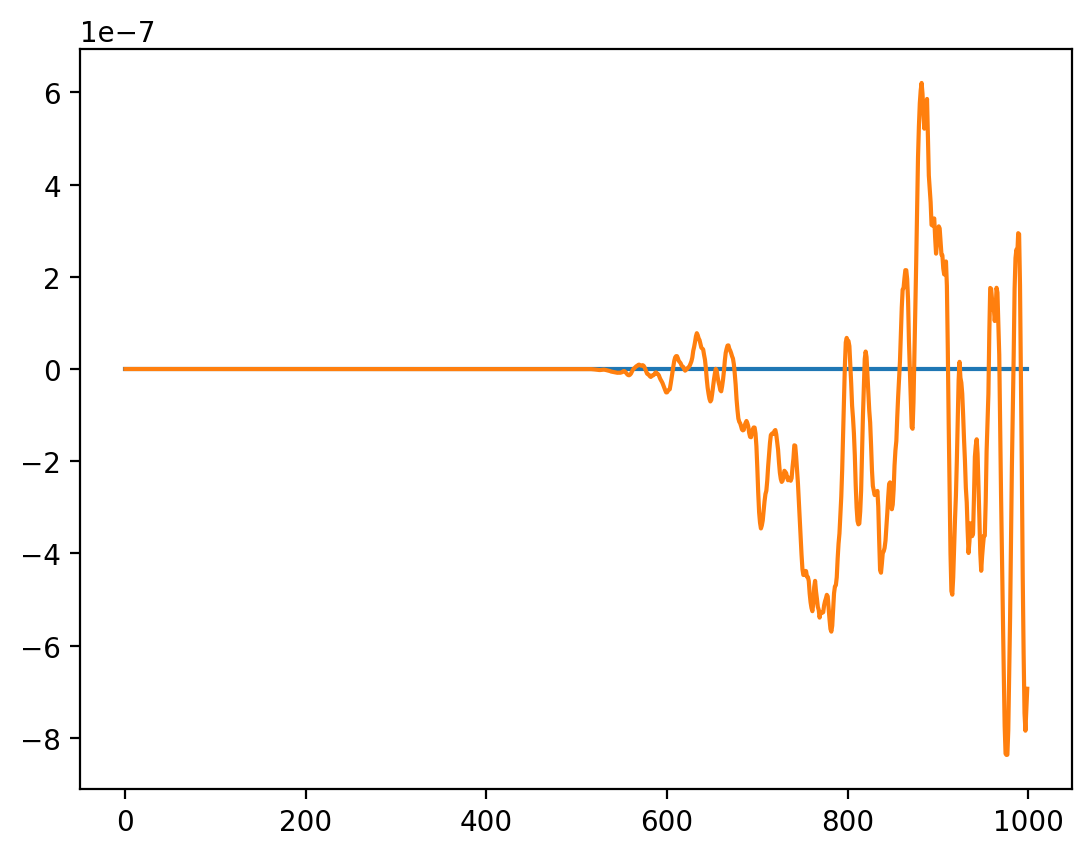

In [29]:
plt.plot(x[:1000])
plt.plot(x_out[:1000])

The Griffin and Lim method is not a perfect reconstruction.
Let's compare this to directly inverting the complex specta from STFT:

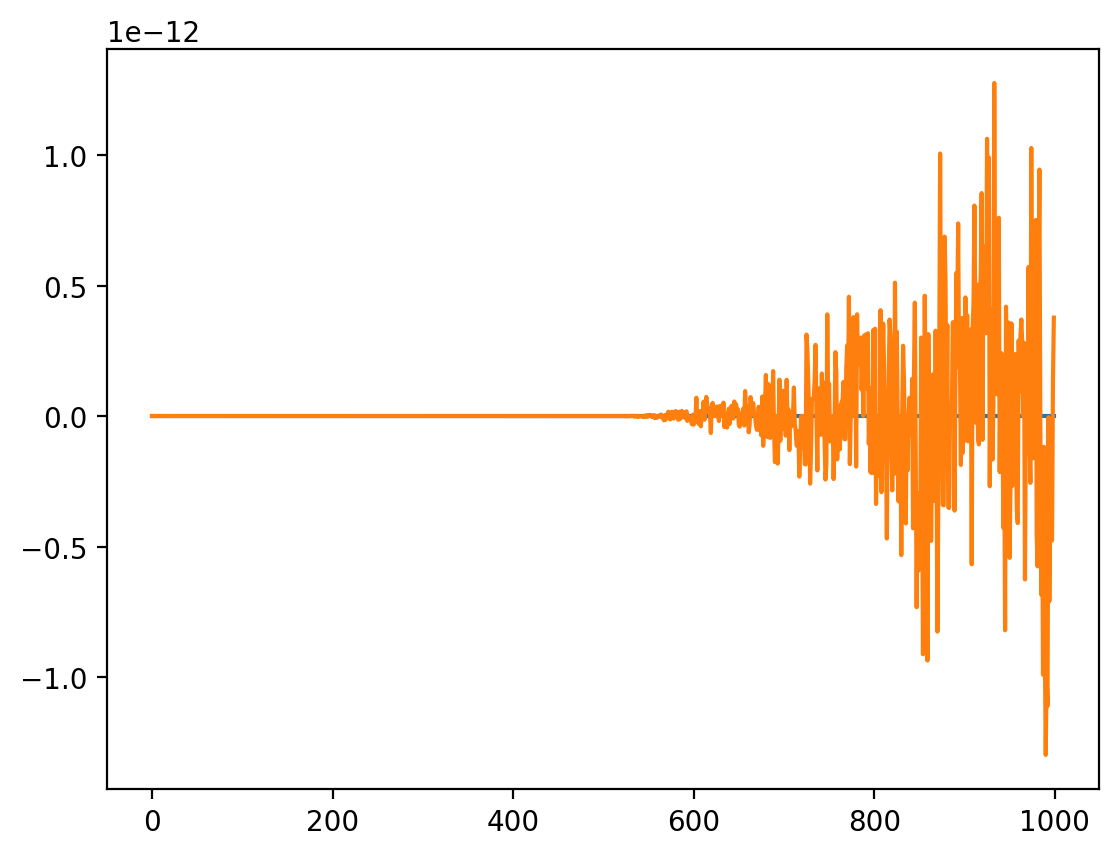

In [30]:
S = librosa.stft(x, n_fft = n_fft)
x_inv = librosa.istft(S, win_length=n_fft)
plt.plot(x[:1000])
plt.plot(x_inv[:1000])

##### Question 9 [5 points]

Describe the difference between the Griffith & Lim and the perfect reconstruction. Does it sound similar? Can you see the difference in the waveform?

``` Your response here ``` The signals sound similar, but not identical. The Griffin & Lim reconstruction captures the general shape and tonal quality of the original sound, but there are small artifacts or distortions due to the missing original phase. it's not a perfect match, especially in detailed waveform comparison.